### Objective: From data Exploration - 
##### 1) remove outliers
##### 2) set up features for regression 
##### 3) printout csv file for linear data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def scatterplot(xname,yname,data):
    plt.scatter(train_rawdf[xname],train_rawdf[yname])
    plt.xlabel(xname,size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    #plt.xlim(xmin=0,xmax=50000)
    plt.show()
    plt.close()
    
yname = 'SalePrice'

In [2]:
train_rawdf = pd.read_csv("../train.csv")
train_rawdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


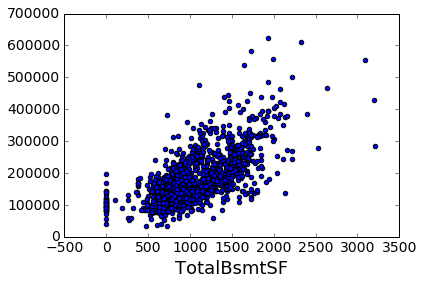

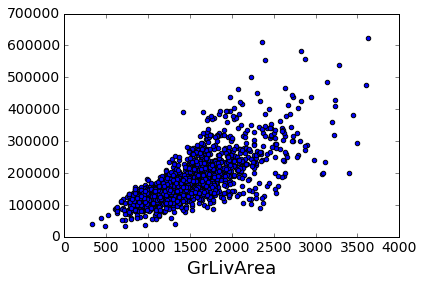

In [3]:
## removing an outlier
train_rawdf = train_rawdf[train_rawdf['TotalBsmtSF'] < 4000]
train_rawdf = train_rawdf[train_rawdf['GrLivArea'] < 4000]
scatterplot('TotalBsmtSF',yname,train_rawdf)
scatterplot('GrLivArea',yname,train_rawdf)


We removed data which I think are outliers from TotalBsmtSF and GrLivArea. However, remember the Lotsize data looks a little strange and I am not sure what to do with if for now. 

In [27]:
replacing_Dict = {
'MSZoning' : {
'C (all)' : 0,
'RM' : 1,
'RH' : 2,
'RL' : 3,
'FV' : 4 
 }, 
'Street' : {
'Grvl' : 0,
'Pave' : 1 
 }, 
'Alley' : {
'Grvl' : 1,
'Pave' : 2,
'nan' : 0 
 }, 
'LotShape' : {
'Reg' : 0,
'IR1' : 1,
'IR3' : 2,
'IR2' : 3 
 }, 
'LandContour' : {
'Bnk' : 0,
'Lvl' : 1,
'Low' : 2,
'HLS' : 3 
 }, 
'Utilities' : {
'NoSeWa' : 0,
'AllPub' : 1 
 }, 
'LotConfig' : {
'Inside' : 0,
'FR2' : 1,
'Corner' : 2,
'FR3' : 3,
'CulDSac' : 4 
 }, 
'LandSlope' : {
'Gtl' : 0,
'Mod' : 1,
'Sev' : 2 
 }, 
'Neighborhood' : {
'MeadowV' : 0,
'IDOTRR' : 1,
'BrDale' : 2,
'BrkSide' : 3,
'Edwards' : 4,
'OldTown' : 5,
'Sawyer' : 6,
'Blueste' : 7,
'SWISU' : 8,
'NPkVill' : 9,
'NAmes' : 10,
'Mitchel' : 11,
'SawyerW' : 12,
'NWAmes' : 13,
'Gilbert' : 14,
'Blmngtn' : 15,
'CollgCr' : 16,
'Crawfor' : 17,
'ClearCr' : 18,
'Somerst' : 19,
'Veenker' : 20,
'Timber' : 21,
'StoneBr' : 22,
'NridgHt' : 23,
'NoRidge' : 24 
 }, 
'Condition1' : {
'Artery' : 0,
'RRAe' : 1,
'Feedr' : 2,
'RRAn' : 3,
'Norm' : 4,
'RRNe' : 5,
'RRNn' : 6,
'PosN' : 7,
'PosA' : 8 
 }, 
'Condition2' : {
'RRNn' : 0,
'Artery' : 1,
'Feedr' : 2,
'RRAn' : 3,
'Norm' : 4,
'RRAe' : 5,
'PosN' : 6,
'PosA' : 7 
 }, 
'BldgType' : {
'2fmCon' : 0,
'Duplex' : 1,
'Twnhs' : 2,
'TwnhsE' : 3,
'1Fam' : 4 
 }, 
'HouseStyle' : {
'1.5Unf' : 0,
'SFoyer' : 1,
'1.5Fin' : 2,
'2.5Unf' : 3,
'SLvl' : 4,
'1Story' : 5,
'2Story' : 6,
'2.5Fin' : 7 
 },
'RoofStyle' : {
'Gambrel' : 0,
'Gable' : 1,
'Mansard' : 2,
'Flat' : 3,
'Hip' : 4,
'Shed' : 5 
 }, 
'RoofMatl' : {
'Roll' : 0,
'ClyTile' : 1,
'CompShg' : 2,
'Metal' : 3,
'Tar&Grv' : 4,
'WdShake' : 5,
'Membran' : 6,
'WdShngl' : 7 
 }, 
'Exterior1st' : {
'BrkComm' : 0,
'AsphShn' : 1,
'CBlock' : 2,
'AsbShng' : 3,
'MetalSd' : 4,
'Wd Sdng' : 5,
'WdShing' : 6,
'Stucco' : 7,
'HdBoard' : 8,
'Plywood' : 9,
'BrkFace' : 10,
'VinylSd' : 11,
'CemntBd' : 12,
'Stone' : 13,
'ImStucc' : 14 
 }, 
'Exterior2nd' : {
'CBlock' : 0,
'AsbShng' : 1,
'Brk Cmn' : 2,
'AsphShn' : 3,
'Wd Sdng' : 4,
'MetalSd' : 5,
'Stucco' : 6,
'Stone' : 7,
'Wd Shng' : 8,
'HdBoard' : 9,
'Plywood' : 10,
'BrkFace' : 11,
'VinylSd' : 12,
'CmentBd' : 13,
'ImStucc' : 14,
'Other' : 15 
 }, 
'MasVnrType' : {
'BrkCmn' : 1,
'None' : 2,
'BrkFace' : 3,
'Stone' : 4,
'nan' : 0 
 }, 
'ExterQual' : {
'Fa' : 0,
'TA' : 1,
'Gd' : 2,
'Ex' : 3 
 }, 
'ExterCond' : {
'Po' : 0,
'Fa' : 1,
'Gd' : 2,
'TA' : 3,
'Ex' : 4 
 }, 
'Foundation' : {
'Slab' : 0,
'BrkTil' : 1,
'CBlock' : 2,
'Stone' : 3,
'Wood' : 4,
'PConc' : 5 
 }, 
'BsmtQual' : {
'Fa' : 1,
'TA' : 2,
'Gd' : 3,
'Ex' : 4,
'nan' : 0 
 }, 
'BsmtCond' : {
'Po' : 1,
'Fa' : 2,
'TA' : 3,
'Gd' : 4,
'nan' : 0
 }, 
'BsmtExposure' : {
'No' : 1,
'Mn' : 2,
'Av' : 3,
'Gd' : 4,
'nan' : 0 
 }, 
'BsmtFinType1' : {
'Rec' : 1,
'BLQ' : 2,
'LwQ' : 3,
'ALQ' : 4,
'Unf' : 5,
'GLQ' : 6,
'nan' : 0
 }, 
'BsmtFinType2' : {
'BLQ' : 1,
'LwQ' : 2,
'Rec' : 3,
'GLQ' : 4,
'Unf' : 5,
'ALQ' : 6,
'nan' : 0
 }, 
'Heating' : {
'Floor' : 0,
'Grav' : 1,
'Wall' : 2,
'OthW' : 3,
'GasW' : 4,
'GasA' : 5 
 }, 
'HeatingQC' : {
'Po' : 0,
'Fa' : 1,
'TA' : 2,
'Gd' : 3,
'Ex' : 4 
 }, 
'CentralAir' : {
'N' : 0,
'Y' : 1 
 }, 
'Electrical' : {
'Mix' : 1,
'FuseP' : 2,
'FuseF' : 3,
'FuseA' : 4,
'SBrkr' : 5,
'nan' : 0
 },
'KitchenQual' : {
'Fa' : 0,
'TA' : 1,
'Gd' : 2,
'Ex' : 3 
 },
'Functional' : {
'Maj2' : 0,
'Sev' : 1,
'Min2' : 2,
'Min1' : 3,
'Maj1' : 4,
'Mod' : 5,
'Typ' : 6 
 }, 
'FireplaceQu' : {
'Po' : 1,
'Fa' : 2,
'TA' : 3,
'Gd' : 4,
'Ex' : 5,
'nan' : 0 
 }, 
'GarageType' : {
'CarPort' : 1,
'Detchd' : 2,
'2Types' : 3,
'Basment' : 4,
'Attchd' : 5,
'BuiltIn' : 6,
'nan' : 0 
 }, 
'GarageFinish' : {
'Unf' : 1,
'RFn' : 2,
'Fin' : 3,
'nan' : 0 
 }, 
'GarageQual' : {
'Po' : 1,
'Fa' : 2,
'TA' : 3,
'Gd' : 4,
'Ex' : 5,
'nan' : 0 
 }, 
'GarageCond' : {
'Po' : 1,
'Fa' : 2,
'TA' : 3,
'Gd' : 4,
'Ex' : 5,
'nan' : 0 
 }, 
'PavedDrive' : {
'N' : 0,
'P' : 1,
'Y' : 2 
 },
'PoolQC' : {
'Gd' : 1,
'Fa' : 2,
'Ex' : 3,
'nan' : 0 
 }, 
'Fence' : {
'MnWw' : 1,
'GdWo' : 2,
'MnPrv' : 3,
'GdPrv' : 4,
'nan' : 0
 }, 
'MiscFeature' : {
'Othr' : 1,
'Shed' : 2,
'Gar2' : 3,
'TenC' : 4,
'nan' : 0
 },
'SaleType' : {
'Oth' : 0,
'ConLD' : 1,
'ConLw' : 2,
'COD' : 3,
'WD' : 4,
'ConLI' : 5,
'CWD' : 6,
'Con' : 7,
'New' : 8 
 }, 
'SaleCondition' : {
'AdjLand' : 0,
'Abnorml' : 1,
'Family' : 2,
'Alloca' : 3,
'Normal' : 4,
'Partial' : 5 
 }
    }
    
train = train_rawdf.replace(replacing_Dict)

train['LotFrontage'].fillna(0.0,inplace=True)
train['Alley'].fillna(0.0,inplace=True)
train['BsmtQual'].fillna(0.0,inplace=True)
train['BsmtCond'].fillna(0.0,inplace=True)

train['BsmtExposure'].fillna(0.0,inplace=True)
train['BsmtFinType1'].fillna(0.0,inplace=True)
train['BsmtFinType2'].fillna(0.0,inplace=True)
train['FireplaceQu'].fillna(0.0,inplace=True)

train['GarageType'].fillna(0.0,inplace=True)
train['GarageYrBlt'].fillna(0.0,inplace=True)
train['GarageFinish'].fillna(0.0,inplace=True)
train['GarageQual'].fillna(0.0,inplace=True)

train['GarageCond'].fillna(0.0,inplace=True)
train['PoolQC'].fillna(0.0,inplace=True)
train['Fence'].fillna(0.0,inplace=True)
train['MiscFeature'].fillna(0.0,inplace=True)

print train[train['Id']==8]
 

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
7   8          60         3          0.0    10382       1    0.0         1   

   LandContour  Utilities    ...      PoolArea  PoolQC  Fence  MiscFeature  \
7            1          1    ...             0     0.0    0.0          2.0   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
7      350      11    2009         4              4     200000  

[1 rows x 81 columns]


In [28]:
train.to_csv('cleaned_train.csv')
